In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the data
df = pd.read_csv('C:/Users/Kaan/Downloads/books.csv', error_bad_lines = False)

C:\Users\Kaan\AppData\Local\Temp\ipykernel_12648\722985911.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('C:/Users/Kaan/Downloads/books.csv', error_bad_lines = False)
Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



In [3]:
df.index = df['bookID']

In [4]:
print("Dataset contains {} rows and {} columns".format(df.shape[0], df.shape[1]))

Dataset contains 11123 rows and 12 columns


In [5]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,,
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [6]:


df.replace(to_replace='J.K. Rowling/Mary GrandPré', value = 'J.K. Rowling', inplace=True)



In [7]:


df.head()



,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,,
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [8]:
from sklearn.preprocessing import OrdinalEncoder

encoding = {'language_code':{'en-US': 'eng', 'en-GB': 'eng', 'en-CA': 'eng'}} # Unify the langauge codes
df.replace(encoding, inplace=True)

enc = OrdinalEncoder()
enc.fit(df[['language_code']])
df[['language_code']] = enc.fit_transform(df[['language_code']]) # Apply ordinal encoding on language_code to convert it into numerical column

In [9]:
df['publication_date'] = pd.to_datetime(df['publication_date'], format='%m/%d/%Y', errors='coerce') # Convert data type of publication_date from object into date type
df[df['publication_date'].isnull()]

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,,
31373,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,0553575104,9780553575101,2.0,718,10608,295,NaT,Bantam Books
45531,45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,2070323285,9782070323289,4.0,640,15,2,NaT,Folio histoire


In [10]:
df.loc[df.bookID == 31373, 'publication_date'] = '1999-10-01 00:00:00'
df.loc[df.bookID == 45531, 'publication_date'] = '1975-10-01 00:00:00'


In [11]:
df['year'] = pd.DatetimeIndex(df['publication_date']).year # Extract year of publication in a separate column


In [12]:
df.rename(columns = {'  num_pages': 'num_pages'}, inplace=True) # Rename the column to remove leading whitespaces

In [13]:


df['num_occ'] = df.groupby('title')['title'].transform('count') # Add a new feature which has the number of occurences of each book



In [14]:
df['rate_occ'] = df['average_rating'] * df['num_occ']
df['rate_weight'] = df['average_rating'] * df['text_reviews_count']
df['rate_weight_2'] = df['average_rating'] * df['ratings_count']
df['rate_per_pages'] = df['average_rating'] * df['num_pages']

C:\Users\Kaan\AppData\Local\Temp\ipykernel_12648\2304795425.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\Kaan\AppData\Local\Temp\ipykernel_12648\2304795425.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<Axes: >

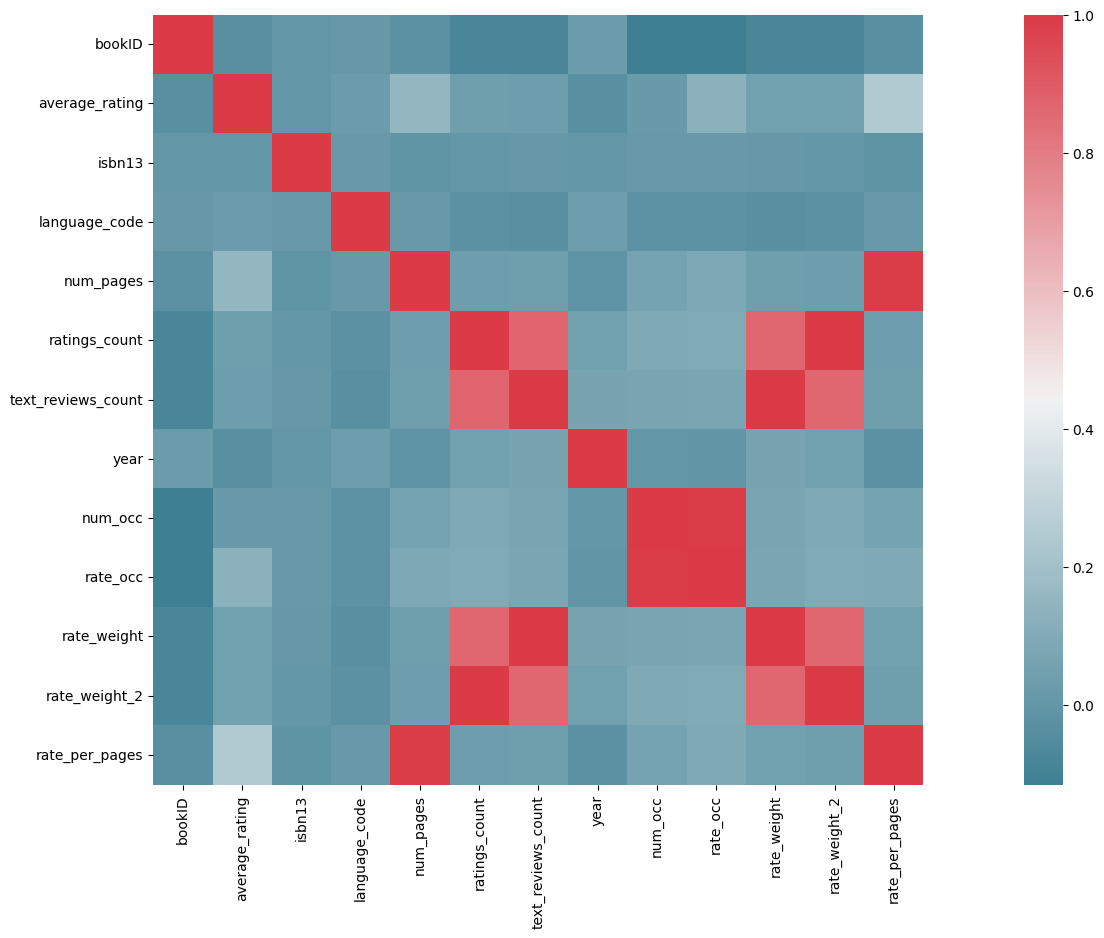

In [15]:
fig = plt.gcf()
fig.set_size_inches(26, 10)
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

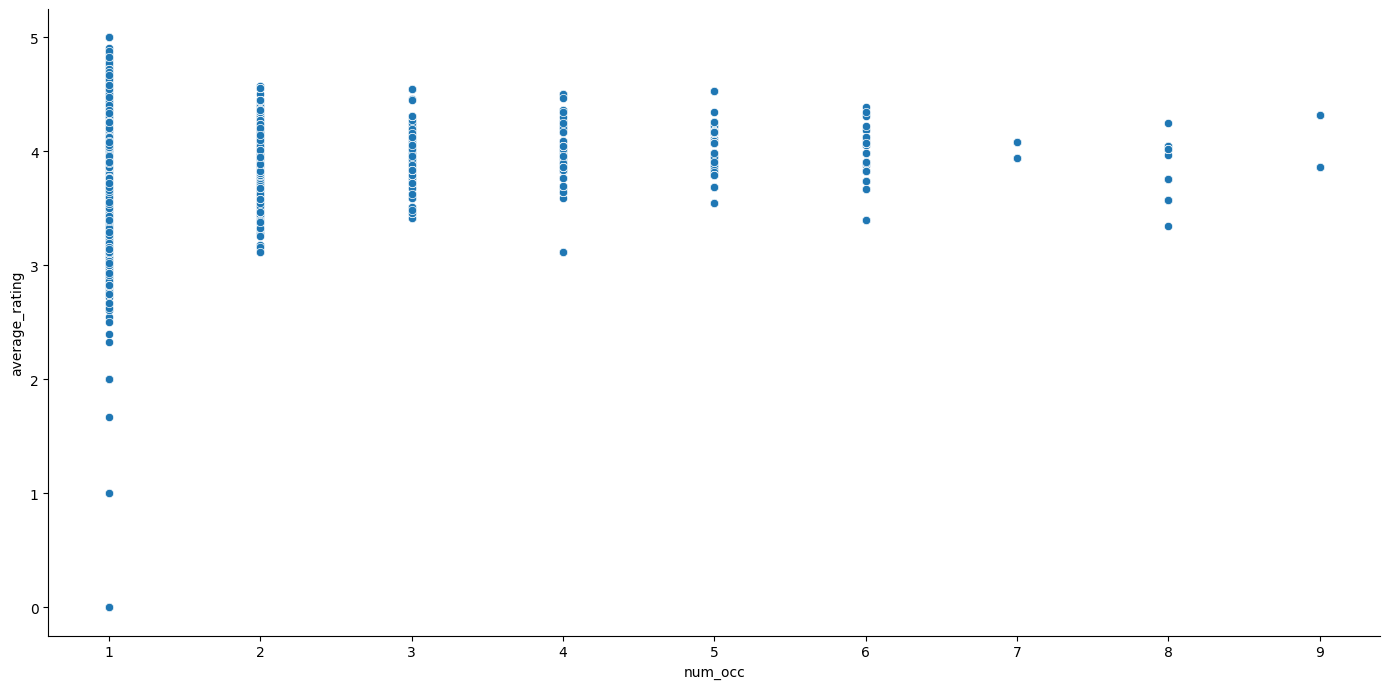

In [16]:
sns.relplot(x="num_occ", y="average_rating", data=df, height=7, aspect = 2)

<Axes: xlabel='year', ylabel='average_rating'>

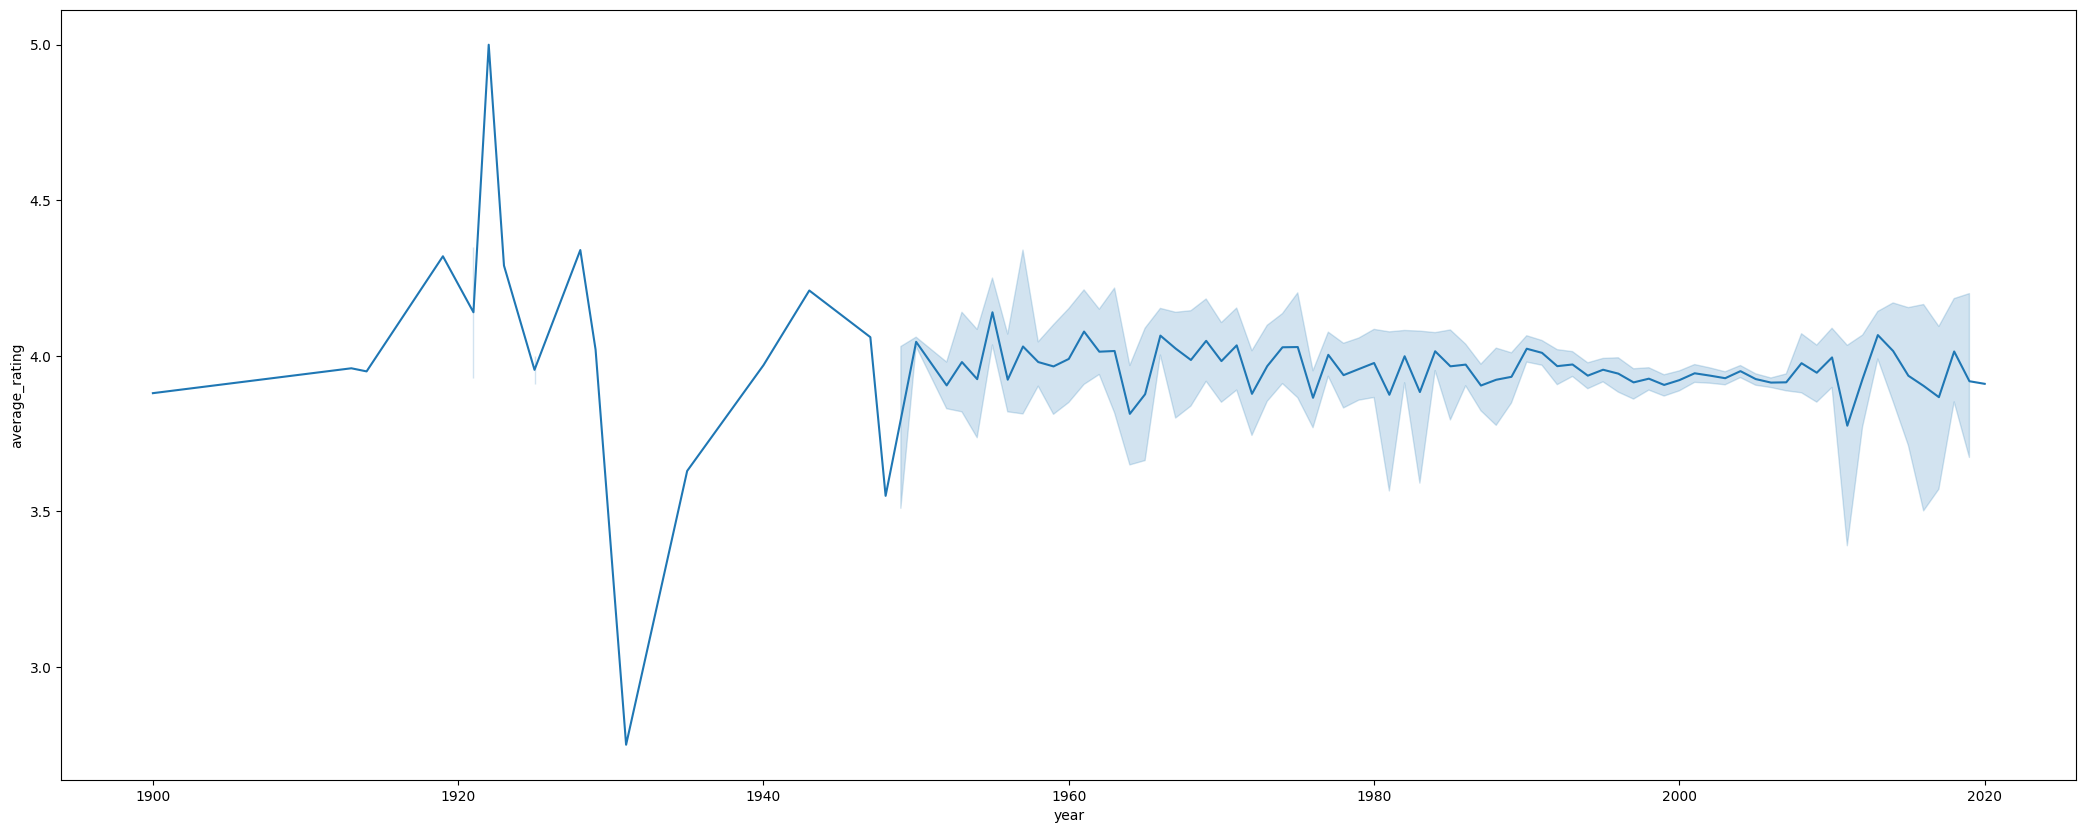

In [17]:
fig = plt.gcf()
fig.set_size_inches(26, 10)
sns.lineplot(x="year", y="average_rating", data=df)

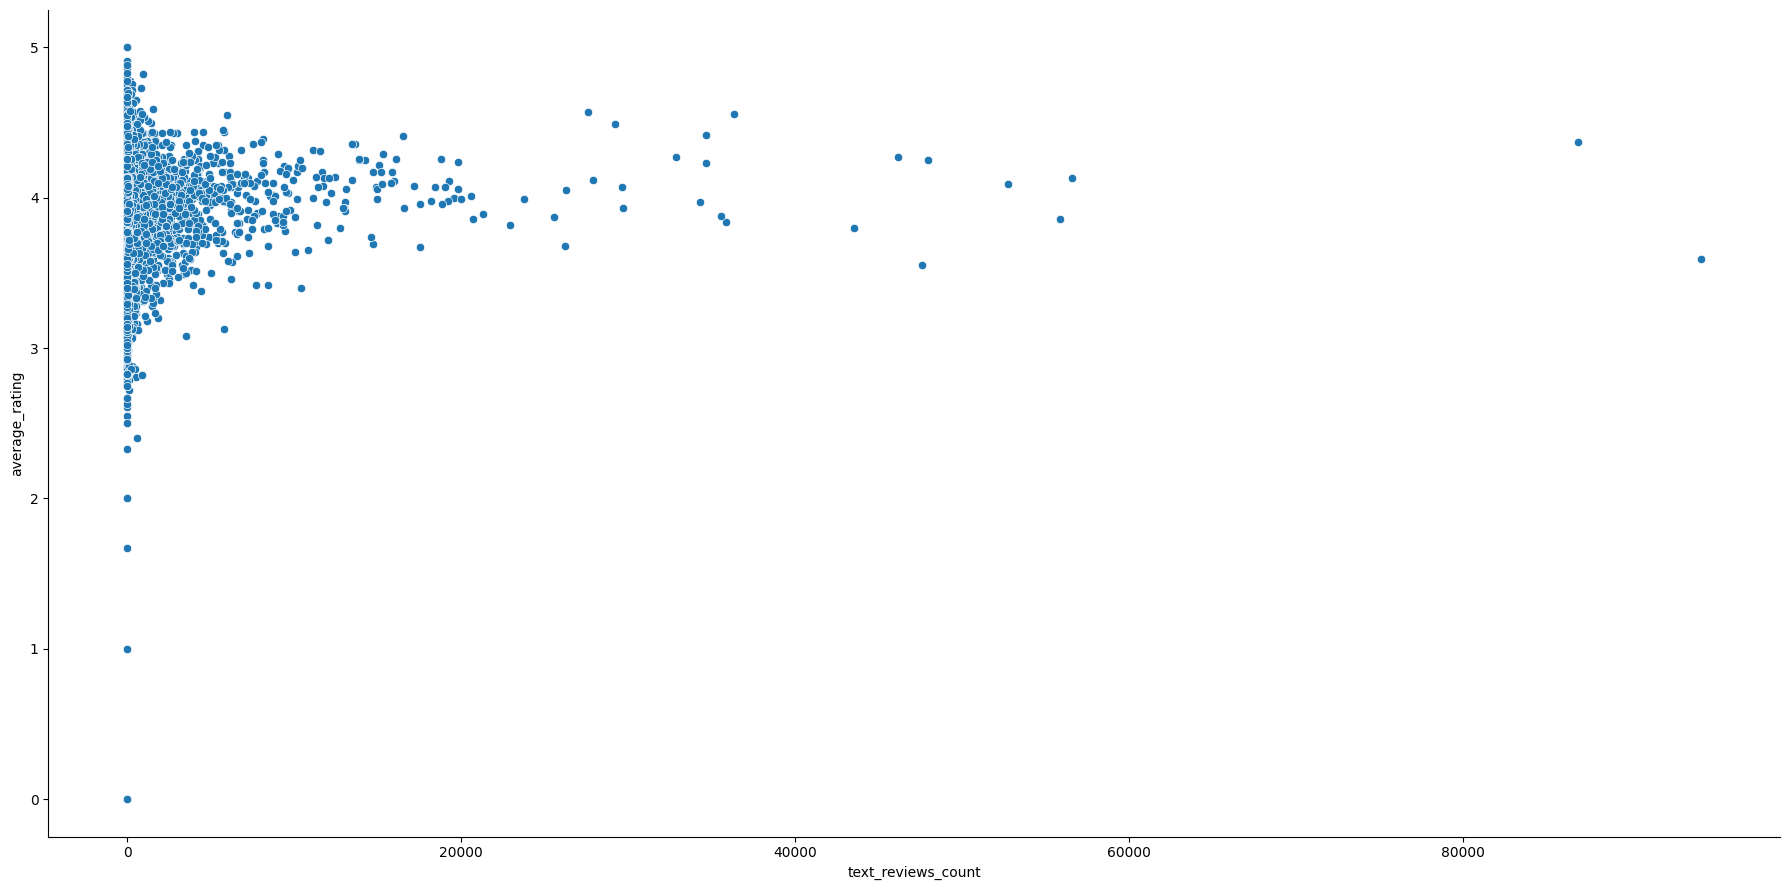

In [18]:


sns.relplot(x="text_reviews_count", y="average_rating", data=df, height=9, aspect = 2)



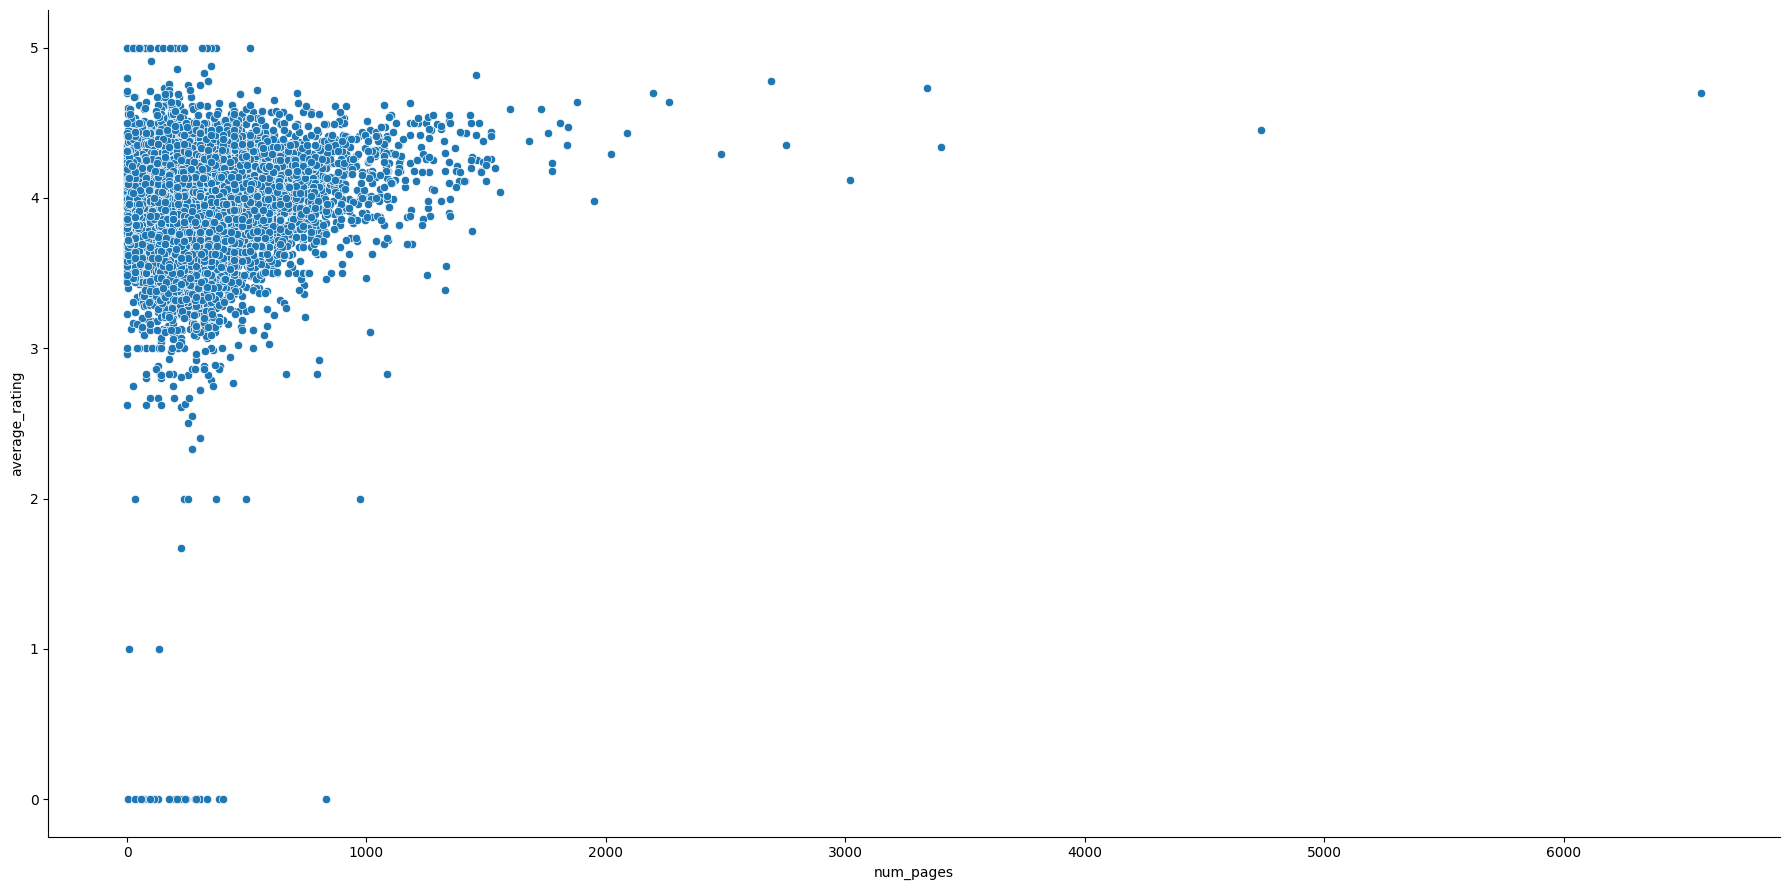

In [19]:
sns.relplot(x="num_pages", y="average_rating", data=df, height=9, aspect = 2)

<Axes: xlabel='year', ylabel='text_reviews_count'>

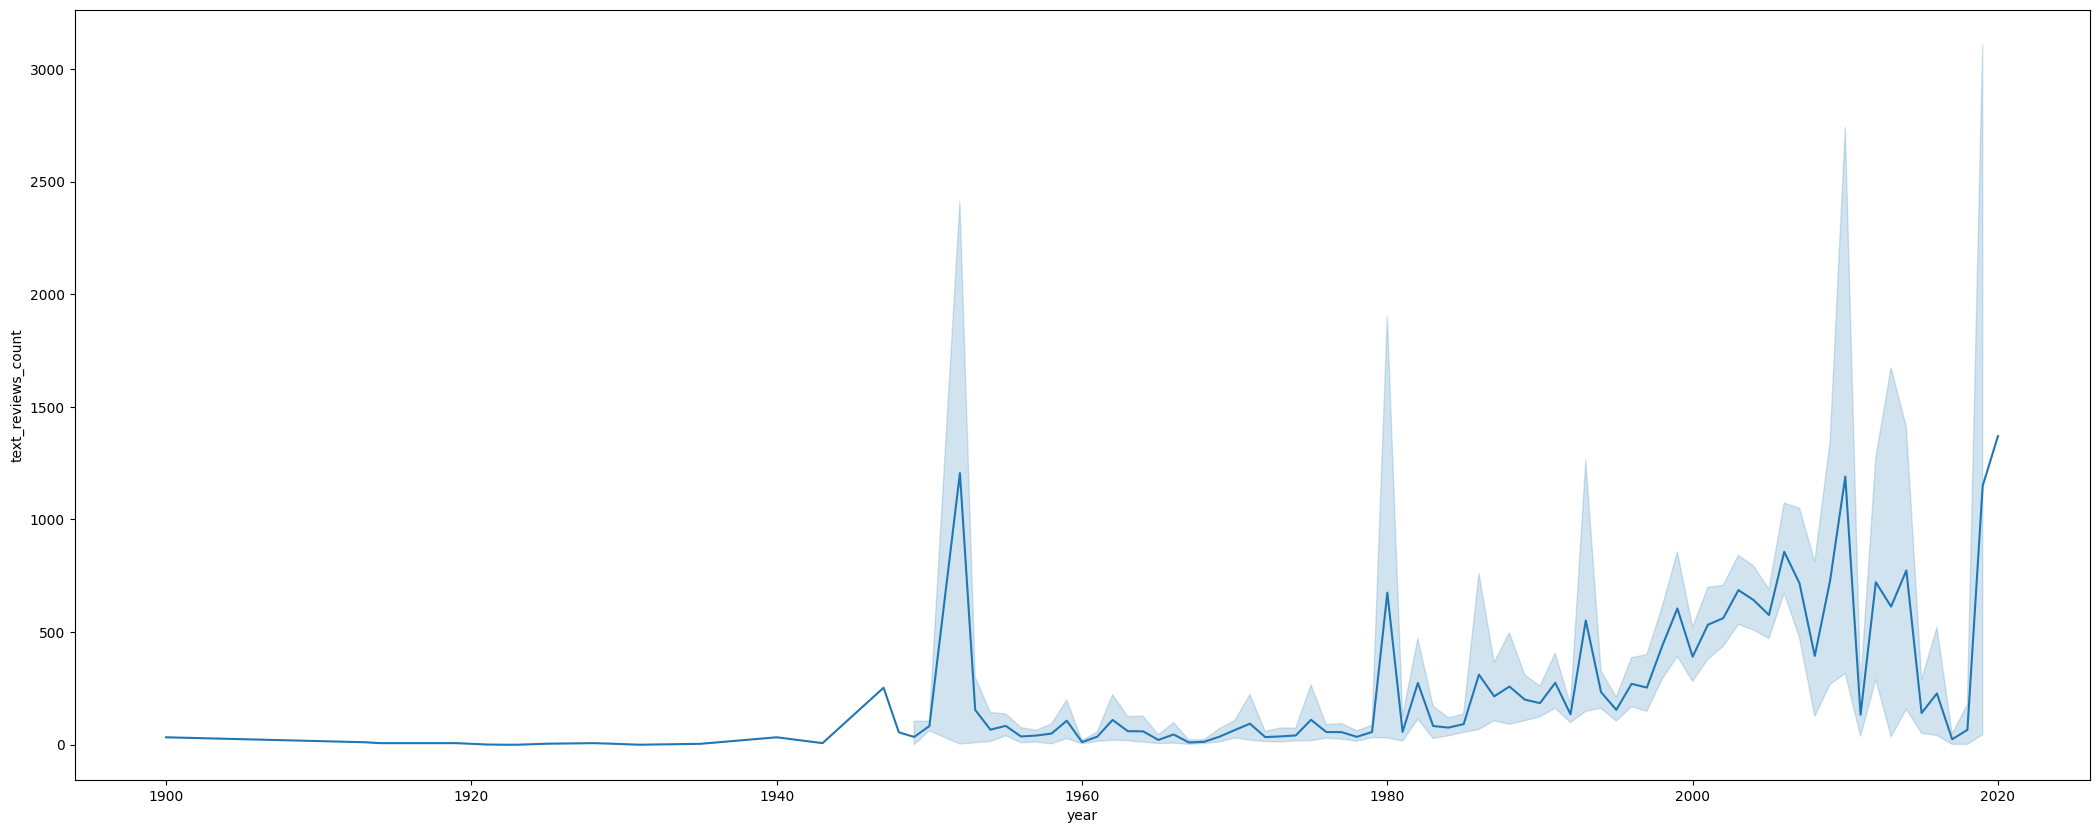

In [20]:
fig = plt.gcf()
fig.set_size_inches(26, 10)
sns.lineplot(x="year", y="text_reviews_count", data=df)

In [21]:


label = df['average_rating'].values
df.drop(['bookID', 'title', 'authors', 'isbn', 'isbn13', 'publication_date', 'publisher', 'average_rating'], axis=1, inplace=True)



In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3)

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4))

parameters = {
    'learning_rate': [0.001, 0.01, 0.02, 0.1, 0.2, 1.0],
    'n_estimators': [10, 50, 100, 200]
}

grad_Ada = GridSearchCV(model, parameters, refit=True)
grad_Ada.fit(X_train, y_train)

print('Best Score: ', grad_Ada.best_score_*100, '\nBest Parameters: ', grad_Ada.best_params_)

Best Score:  94.30708988006066 
Best Parameters:  {'learning_rate': 0.02, 'n_estimators': 200}


In [24]:
from eli5.sklearn import PermutationImportance
import eli5
perm = PermutationImportance(grad_Ada.best_estimator_, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
2.0898 ± 0.0804,rate_occ
0.3119 ± 0.0165,num_occ
0.0010 ± 0.0009,rate_per_pages
0.0009 ± 0.0003,ratings_count
0.0001 ± 0.0000,rate_weight_2
0.0000 ± 0.0001,rate_weight
0 ± 0.0000,year
0 ± 0.0000,text_reviews_count
0 ± 0.0000,num_pages
0 ± 0.0000,language_code


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

model  = LinearRegression()

parameters = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    
}

grad_Linear = GridSearchCV(model, parameters, refit=True)
grad_Linear.fit(X_train, y_train)

print('Best Score: ', grad_Linear.best_score_*100, '\nBest Parameters: ', grad_Linear.best_params_)

C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavi

Best Score:  81.8000530494316 
Best Parameters:  {'fit_intercept': True, 'normalize': True}


C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: Fu

In [26]:
perm = PermutationImportance(grad_Linear.best_estimator_, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
49.2663 ± 0.9699,rate_occ
47.3605 ± 1.8982,num_occ
14.4693 ± 0.4347,rate_per_pages
13.5518 ± 0.4020,num_pages
0.4407 ± 0.0076,ratings_count
0.4146 ± 0.0242,rate_weight_2
0.2199 ± 0.0120,rate_weight
0.2111 ± 0.0297,text_reviews_count
0.0002 ± 0.0002,language_code
0.0000 ± 0.0002,year


In [27]:
from sklearn.linear_model import Ridge

model = Ridge()

parameters = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'max_iter': [1000, 100, 10000],
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

grad_ridge = GridSearchCV(model, parameters, refit=True)
grad_ridge.fit(X_train, y_train)

print('Best Score: ', grad_ridge.best_score_*100, '\nBest Parameters: ', grad_ridge.best_params_)

C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessin

C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessin

C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: Fu

C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessin

C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessin

C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessin

C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessin

C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: Fu

C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: Fu

C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessin

C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessin

C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. 

C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: Fu

C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:148: Fu

Best Score:  81.83058444785664 
Best Parameters:  {'alpha': 1, 'fit_intercept': True, 'max_iter': 1000, 'normalize': False}


C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\Kaan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessin

In [28]:
perm = PermutationImportance(grad_ridge.best_estimator_, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
47.2369 ± 0.9317,rate_occ
45.3933 ± 1.8225,num_occ
15.3044 ± 0.4553,rate_per_pages
14.3313 ± 0.4301,num_pages
0.4434 ± 0.0077,ratings_count
0.4169 ± 0.0244,rate_weight_2
0.2317 ± 0.0123,rate_weight
0.2225 ± 0.0312,text_reviews_count
0.0002 ± 0.0002,language_code
0.0000 ± 0.0002,year


In [29]:
l = []
l.append(('AdaBoost', grad_Ada.best_score_*100))
l.append(('Linear Regression', grad_Linear.best_score_*100))
l.append(('Ridge Regression', grad_ridge.best_score_*100))
scores = pd.DataFrame(l, columns =['Model', 'Train Score'])


In [30]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [31]:
pred_adaboost = grad_Ada.predict(X_test)

In [32]:
print("Residual sum of squares: ",  np.mean((pred_adaboost - y_test) ** 2))
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test, pred_adaboost))))
print('Model Score on Test Data: ', grad_Ada.score(X_test, y_test))

Residual sum of squares:  0.0072371052070702635
RMSE: 0.08507117729919025
Model Score on Test Data:  0.9407230502846746


In [33]:
pred_lr = grad_Linear.predict(X_test)

In [34]:
print("Residual sum of squares: ",  np.mean((pred_lr - y_test) ** 2))
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test, pred_lr))))
print('Model Score on Test Data: ', grad_Linear.score(X_test, y_test))

Residual sum of squares:  0.02508963744380378
RMSE: 0.1583970878640254
Model Score on Test Data:  0.7944983339914484


In [35]:
# Ridge Regression Model
pred_ridge = grad_ridge.predict(X_test)

# Check Model Score
print("Residual sum of squares: ",  np.mean((pred_ridge - y_test) ** 2))
print('RMSE: '+str(np.sqrt(mean_squared_error(y_test, pred_ridge))))
print('Model Score on Test Data: ', grad_ridge.score(X_test, y_test))

Residual sum of squares:  0.025366884809150402
RMSE: 0.15926984902721042
Model Score on Test Data:  0.792227484298908


In [36]:
l2 = []
l2.append(('AdaBoost', grad_Ada.score(X_test, y_test)*100))
l2.append(('Linear Regression', grad_Linear.score(X_test, y_test)*100))
l2.append(('Ridge Regression', grad_ridge.score(X_test, y_test)*100))

test_scores = pd.DataFrame(l2, columns =['Model', 'Test Score'])

In [37]:


scores['Test Score'] = test_scores['Test Score']
scores



,Model,Train Score,Test Score
0,AdaBoost,94.307090,94.072305
1,Linear Regression,81.800053,79.449833
2,Ridge Regression,81.830584,79.222748
